<a href="https://colab.research.google.com/github/RameshKelavath/Clustering-and-Fitting/blob/main/Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!git clone https://github.com/Data-Science-Challenge-Group-4/Team-Project-Group4.git


Cloning into 'Team-Project-Group4'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 8 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (8/8), 190.79 KiB | 1.54 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
!git config --global user.email "rameshkelavath5@gmail.com"
!git config --global user.name "RameshKelavath"


In [ ]:
!ls


sample_data  Team-Project-Group4


In [ ]:
!git init


hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


In [ ]:
!git remote add origin https://github.com/Data Science Challenge Group 4/Team-Project-Group4.git


usage: git remote add [<options>] <name> <url>

    -f, --fetch           fetch the remote branches
    --tags                import all tags and associated objects when fetching
                          or do not fetch any tag at all (--no-tags)
    -t, --track <branch>  branch(es) to track
    -m, --master <branch>
                          master branch
    --mirror[=(push|fetch)]
                          set up remote as a mirror to push to or fetch from



In [ ]:
!git remote -v


In [ ]:
!git checkout -b project-branch


Switched to a new branch 'project-branch'


In [ ]:
!git add .
!git commit -m "Initial commit with folder structure"


hint: You've added another git repository inside your current repository.
hint: Clones of the outer repository will not contain the contents of
hint: the embedded repository and will not know how to obtain it.
hint: If you meant to add a submodule, use:
hint: 
hint: 	git submodule add <url> Team-Project-Group4
hint: 
hint: If you added this path by mistake, you can remove it from the
hint: index with:
hint: 
hint: 	git rm --cached Team-Project-Group4
hint: 
hint: See "git help submodule" for more information.
[project-branch (root-commit) 5dbe5d6] Initial commit with folder structure
 22 files changed, 51026 insertions(+)
 create mode 100644 .config/.last_opt_in_prompt.yaml
 create mode 100644 .config/.last_survey_prompt.yaml
 create mode 100644 .config/.last_update_check.json
 create mode 100644 .config/active_config
 create mode 100644 .config/config_sentinel
 create mode 100644 .config/configurations/config_default
 create mode 100644 .config/default_configs.db
 create mode 100644 .

In [ ]:
import getpass

# This will securely ask you for your token (you'll paste it when prompted)
token = getpass.getpass('Enter your GitHub token: ')

# Replace with your actual org and repo
!git remote set-url origin https://{token}@github.com/Data-Science-Challenge-Group4/Team-Project-Group4.git


Enter your GitHub token: ··········
error: No such remote 'origin'


In [ ]:
!git add .
!git commit -m "Add folder structure and create branch"
!git push -u origin project-branch


On branch project-branch
nothing to commit, working tree clean
fatal: 'origin' does not appear to be a git repository
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


In [ ]:
%cd Team-Project-Group4


[Errno 2] No such file or directory: 'Team-Project-Group4'
/content/Team-Project-Group4


# Module Import

In [ ]:

# !pip install -q scikit-learn pandas matplotlib

import os, json, warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier


# Loading the data

In [ ]:
DATA_DIR = Path(".")  # change if your files are elsewhere

train_path = DATA_DIR / "dataset_B_training.csv"
test_path  = DATA_DIR / "dataset_B_testing.csv"
example_sub_path = DATA_DIR / "dataset_B_example_submission.csv"

train = pd.read_csv(train_path)
test  = pd.read_csv(test_path)
example_sub = pd.read_csv(example_sub_path)  # provided with the dataset

print("Train shape:", train.shape)
print("Test  shape:", test.shape)
print("Example submission shape:", example_sub.shape)

train.head()


Train shape: (4756, 31)
Test  shape: (4749, 30)
Example submission shape: (4749, 2)


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,employment_sector,h1n1_vaccine
0,1,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",2.0,1.0,construction,0
1,2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Female,Below Poverty,Not Married,Own,Employed,Non-MSA,0.0,3.0,wholesale,0
2,3,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Female,"> $75,000",Not Married,Own,Employed,"MSA, Principle City",0.0,0.0,real_estate,1
3,4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Female,"<= $75,000, Above Poverty",Not Married,Rent,Not in Labor Force,Non-MSA,0.0,0.0,NaN,0
4,5,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Female,NaN,Not Married,NaN,Unemployed,Non-MSA,3.0,0.0,NaN,0


In [ ]:
example_sub.head()

,respondent_id,h1n1_vaccine
0,4757,0.0
1,4758,0.0
2,4759,0.0
3,4760,0.0
4,4761,0.0


In [ ]:
example_sub.tail()

,respondent_id,h1n1_vaccine
4744,9501,0.0
4745,9502,0.0
4746,9503,0.0
4747,9504,0.0
4748,9505,0.0


In [ ]:
# Detect ID & predicted column from the example submission
pred_column_name = example_sub.columns[-1]
id_columns = list(example_sub.columns[:-1])  # usually ['respondent_id']

# Detect target = column in train not in test (or fallback to example's pred name)
candidate_targets = list(set(train.columns) - set(test.columns))
target_col = candidate_targets[0] if len(candidate_targets)==1 else pred_column_name

print("ID column(s):", id_columns)
print("Target column:", target_col)

# Determine task type (binary/multi-class vs regression)
y = train[target_col]
if pd.api.types.is_numeric_dtype(y) and y.nunique() > max(15, int(0.05*len(y))):
    task_type = "regression"
else:
    task_type = "classification"
print("Inferred task:", task_type, "| unique target vals:", y.nunique())


ID column(s): ['respondent_id']
Target column: h1n1_vaccine
Inferred task: classification | unique target vals: 2


# Exploratory Data Analysis

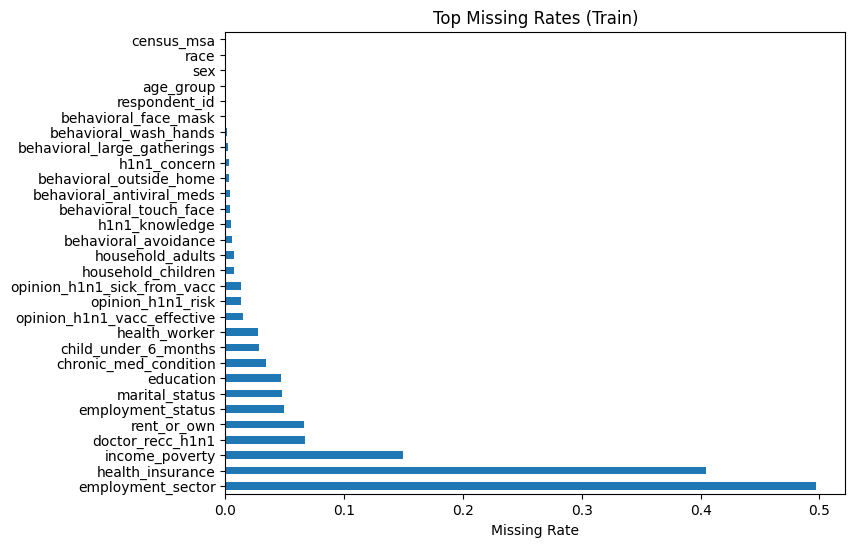

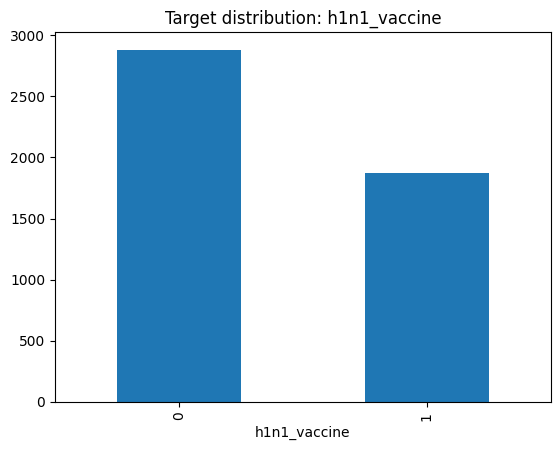

Numeric features: 20 | Categorical features: 10


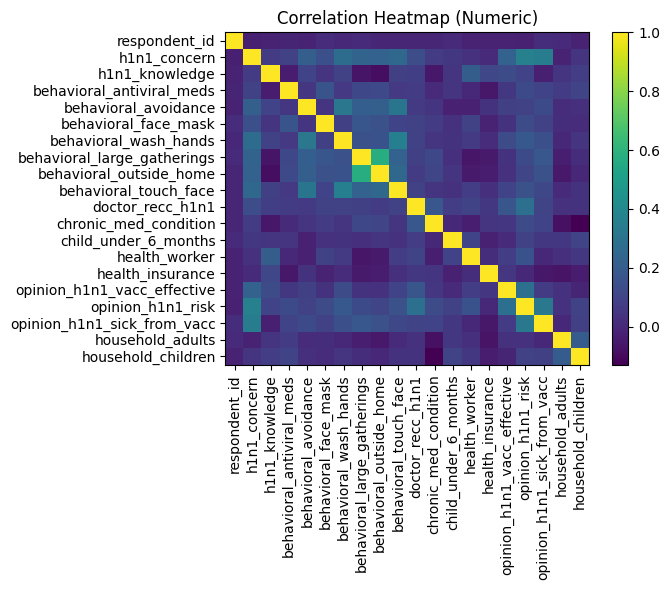

In [ ]:
# Missingness (top 30)
miss = train.isnull().mean().sort_values(ascending=False)
plt.figure(figsize=(8,6))
miss.head(30).plot(kind="barh")
plt.title("Top Missing Rates (Train)")
plt.xlabel("Missing Rate")
plt.show()

# Target distribution / summary
if task_type == "classification":
    train[target_col].value_counts(dropna=False).sort_index().plot(kind="bar")
    plt.title(f"Target distribution: {target_col}")
    plt.show()
else:
    plt.hist(train[target_col].dropna(), bins=30)
    plt.title(f"Target histogram: {target_col}")
    plt.show()

# Split feature types
num_cols = [c for c in train.columns if pd.api.types.is_numeric_dtype(train[c]) and c != target_col]
cat_cols = [c for c in train.columns if not pd.api.types.is_numeric_dtype(train[c]) and c != target_col]
print(f"Numeric features: {len(num_cols)} | Categorical features: {len(cat_cols)}")

# Correlation heatmap (numeric only)
if len(num_cols) >= 2:
    corr = train[num_cols].corr(numeric_only=True)
    plt.figure(figsize=(7,6))
    plt.imshow(corr, aspect="auto")
    plt.colorbar()
    plt.title("Correlation Heatmap (Numeric)")
    plt.xticks(range(len(num_cols)), num_cols, rotation=90)
    plt.yticks(range(len(num_cols)), num_cols)
    plt.tight_layout()
    plt.show()


# Define Preprocessing (Imputation + Scaling +Onehot)

In [ ]:
X = train.drop(columns=[target_col])
y = train[target_col]

num_cols = [c for c in X.columns if pd.api.types.is_numeric_dtype(X[c])]
cat_cols = [c for c in X.columns if not pd.api.types.is_numeric_dtype(X[c])]

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler(with_mean=False))  # with_mean=False keeps sparse compatibility
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ]
)


# Train/validation split

In [ ]:
strat = y if task_type == "classification" else None
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=strat
)


# Fit several baseline models

In [ ]:
models = {
    "Dummy(stratified)": DummyClassifier(strategy="stratified", random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=300, solver="liblinear"),
    "RandomForest": RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "HistGradientBoosting": HistGradientBoostingClassifier(random_state=42),
}

def eval_model(pipe, X_val, y_val):
    if task_type == "classification":
        proba = pipe.predict_proba(X_val)[:, 1] if hasattr(pipe, "predict_proba") else None
        preds = pipe.predict(X_val)
        acc = accuracy_score(y_val, preds)
        f1  = f1_score(y_val, preds, average="binary")
        roc = roc_auc_score(y_val, proba) if proba is not None else np.nan
        return {"accuracy": acc, "f1": f1, "roc_auc": roc}
    else:
        raise NotImplementedError("This template targets classification tasks.")

results = []
fitted_baselines = {}

for name, clf in models.items():
    pipe = Pipeline([("preprocess", preprocess), ("model", clf)])
    pipe.fit(X_train, y_train)
    metrics = eval_model(pipe, X_valid, y_valid)
    fitted_baselines[name] = pipe
    print(f"{name:>22} | ACC={metrics['accuracy']:.4f}  F1={metrics['f1']:.4f}  ROC_AUC={metrics['roc_auc']:.4f}")
    results.append({"model": name, **metrics})

baseline_df = pd.DataFrame(results).sort_values("roc_auc", ascending=False)
baseline_df


     Dummy(stratified) | ACC=0.5168  F1=0.3817  ROC_AUC=0.4926
    LogisticRegression | ACC=0.7595  F1=0.6705  ROC_AUC=0.8162
          RandomForest | ACC=0.7521  F1=0.6609  ROC_AUC=0.7945
      GradientBoosting | ACC=0.7658  F1=0.6801  ROC_AUC=0.8066
  HistGradientBoosting | ACC=0.7458  F1=0.6620  ROC_AUC=0.7973


,model,accuracy,f1,roc_auc
1,LogisticRegression,0.759454,0.670504,0.816236
3,GradientBoosting,0.765756,0.680057,0.806563
4,HistGradientBoosting,0.745798,0.662011,0.797310
2,RandomForest,0.752101,0.660920,0.794463
0,Dummy(stratified),0.516807,0.381720,0.492626


# hyper-parameter tuning for top candidates

In [ ]:
# Pick top 2 (excluding Dummy)
top_two = [m for m in baseline_df["model"] if not m.startswith("Dummy")][:2]
top_two


['LogisticRegression', 'GradientBoosting']

In [ ]:
tuned = {}

for name in top_two:
    if name == "LogisticRegression":
        est = Pipeline([("preprocess", preprocess),
                        ("model", LogisticRegression(max_iter=500, solver="liblinear"))])
        grid = {
            "model__C": [0.25, 0.5, 1.0, 2.0],
            "model__penalty": ["l1", "l2"],
        }
    elif name == "RandomForest":
        est = Pipeline([("preprocess", preprocess),
                        ("model", RandomForestClassifier(random_state=42, n_jobs=-1))])
        grid = {
            "model__n_estimators": [200, 400],
            "model__max_depth": [None, 10, 16],
            "model__min_samples_split": [2, 5],
        }
    elif name == "GradientBoosting":
        est = Pipeline([("preprocess", preprocess),
                        ("model", GradientBoostingClassifier(random_state=42))])
        grid = {
            "model__n_estimators": [150, 300],
            "model__learning_rate": [0.05, 0.1, 0.2],
            "model__max_depth": [2, 3],
        }
    elif name == "HistGradientBoosting":
        est = Pipeline([("preprocess", preprocess),
                        ("model", HistGradientBoostingClassifier(random_state=42))])
        grid = {
            "model__learning_rate": [0.05, 0.1, 0.2],
            "model__max_depth": [None, 6, 12],
            "model__max_leaf_nodes": [31, 63],
        }
    else:
        continue

    gs = GridSearchCV(est, grid, scoring="roc_auc", cv=3, n_jobs=-1, verbose=0)
    gs.fit(X_train, y_train)
    best = gs.best_estimator_
    m = eval_model(best, X_valid, y_valid)
    tuned[name + "_Tuned"] = (best, m, gs.best_params_)
    print(f"Best {name}: ROC_AUC={m['roc_auc']:.4f} | ACC={m['accuracy']:.4f} | F1={m['f1']:.4f}")
    print("  Params:", gs.best_params_)


Best LogisticRegression: ROC_AUC=0.8162 | ACC=0.7553 | F1=0.6676
  Params: {'model__C': 0.5, 'model__penalty': 'l1'}
Best GradientBoosting: ROC_AUC=0.8111 | ACC=0.7626 | F1=0.6744
  Params: {'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 150}


# select upto 5 submission candidates

In [ ]:
# Collate candidates (tuned + base)
candidates = []

# Tuned first
for name, (pipe, metrics, params) in tuned.items():
    candidates.append((name, pipe, metrics["roc_auc"]))

# Add baselines (fit on full training shortly)
for name, pipe in fitted_baselines.items():
    # Evaluate they already trained on split; use the measured ROC to rank
    proba = pipe.predict_proba(X_valid)[:, 1] if hasattr(pipe, "predict_proba") else None
    roc = roc_auc_score(y_valid, proba) if proba is not None else -np.inf
    candidates.append((name, pipe, roc))

# Rank and take top 5 distinct models
candidates = sorted(candidates, key=lambda x: x[2], reverse=True)

# Keep only first occurrence of each model label
seen, top5 = set(), []
for name, pipe, roc in candidates:
    if name not in seen:
        seen.add(name)
        top5.append((name, pipe, roc))
    if len(top5) == 5:
        break

[(n, round(r,4)) for n,_,r in top5]


[('LogisticRegression_Tuned', np.float64(0.8162)),
 ('LogisticRegression', np.float64(0.8162)),
 ('GradientBoosting_Tuned', np.float64(0.8111)),
 ('GradientBoosting', np.float64(0.8066)),
 ('HistGradientBoosting', np.float64(0.7973))]

In [ ]:
# Use the example submission format to preserve ID column order/name
pred_col = pred_column_name
id_cols = id_columns  # typically ['respondent_id']

sub_paths = []

for rank, (name, pipe, _) in enumerate(top5, start=1):
    # Refit on full training
    pipe.fit(X, y)
    # Predict probabilities for positive class
    if hasattr(pipe, "predict_proba"):
        proba_test = pipe.predict_proba(test)[:, 1]
    elif hasattr(pipe, "decision_function"):
        s = pipe.decision_function(test)
        # fallback min-max scale
        proba_test = (s - s.min()) / (s.max() - s.min() + 1e-9)
    else:
        proba_test = pipe.predict(test).astype(float)

    # Build submission mirroring example format (ID columns + prediction col)
    sub = pd.DataFrame()
    for c in example_sub.columns[:-1]:
        sub[c] = test[c]
    sub[pred_col] = proba_test

    fname = f"submission_rank{rank:02d}_{name.replace(' ', '_')}.csv"
    sub.to_csv(fname, index=False)
    sub_paths.append((rank, name, fname))

sub_paths


[(1,
  'LogisticRegression_Tuned',
  'submission_rank01_LogisticRegression_Tuned.csv'),
 (2, 'LogisticRegression', 'submission_rank02_LogisticRegression.csv'),
 (3, 'GradientBoosting_Tuned', 'submission_rank03_GradientBoosting_Tuned.csv'),
 (4, 'GradientBoosting', 'submission_rank04_GradientBoosting.csv'),
 (5, 'HistGradientBoosting', 'submission_rank05_HistGradientBoosting.csv')]

# Final validation report

In [ ]:
def report(pipe, X_val, y_val, name):
    proba = pipe.predict_proba(X_val)[:, 1] if hasattr(pipe, "predict_proba") else None
    preds = (proba >= 0.5).astype(int) if proba is not None else pipe.predict(X_val)
    print(f"\n{name} — Validation Report")
    print(classification_report(y_val, preds, digits=4))

# Print reports for your top 3
for name, pipe, _ in top5[:3]:
    report(pipe, X_valid, y_valid, name)



LogisticRegression_Tuned — Validation Report
              precision    recall  f1-score   support

           0     0.7769    0.8510    0.8122       577
           1     0.7312    0.6240    0.6734       375

    accuracy                         0.7616       952
   macro avg     0.7541    0.7375    0.7428       952
weighted avg     0.7589    0.7616    0.7575       952


LogisticRegression — Validation Report
              precision    recall  f1-score   support

           0     0.7803    0.8492    0.8133       577
           1     0.7315    0.6320    0.6781       375

    accuracy                         0.7637       952
   macro avg     0.7559    0.7406    0.7457       952
weighted avg     0.7610    0.7637    0.7600       952


GradientBoosting_Tuned — Validation Report
              precision    recall  f1-score   support

           0     0.7879    0.8562    0.8206       577
           1     0.7446    0.6453    0.6914       375

    accuracy                         0.7731       95